<a href="https://colab.research.google.com/github/MariamMoawed/Customer-Segmentation-Analysis/blob/main/CustomerSegmentationAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
!unzip "/content/archive (2).zip"

Archive:  /content/archive (2).zip
replace Customer_Segmentation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [23]:
# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/Customer_Segmentation.csv')


In [24]:
# Data Exploration and Cleaning
# ... (Explore the dataset, handle missing data, etc.)
print(data.head())


   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


In [25]:
missing_values = data.isnull().sum()
print(missing_values)


Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64


In [26]:
data.drop_duplicates(inplace=True)

In [27]:
# Descriptive Statistics

avg_purchase_value = data['Card Debt'].mean()
purchase_frequency = data.groupby('Customer Id')['Income'].nunique()

In [28]:
# Customer Segmentation using K-means
# Assume we have features like 'Income', 'Card Debt', and 'Card Debt '
features = data[['Income', 'Card Debt', 'Card Debt']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [29]:
# Determine optimal number of clusters (elbow method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

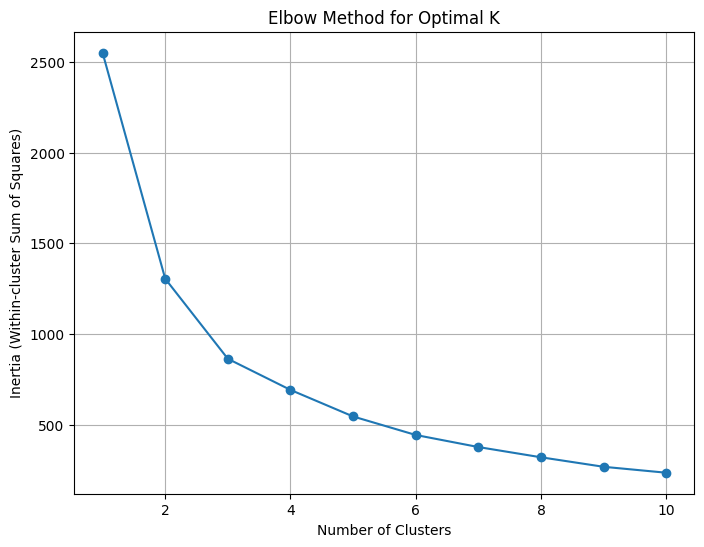

In [30]:
# Visualize the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [31]:
# Fit K-means with the chosen K
kmeans_final = KMeans(n_clusters=3, random_state=42)
kmeans_final.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [32]:
print(kmeans_final)

KMeans(n_clusters=3, random_state=42)


In [33]:
# Add cluster labels to the original dataset
data['Cluster'] = kmeans_final.labels_

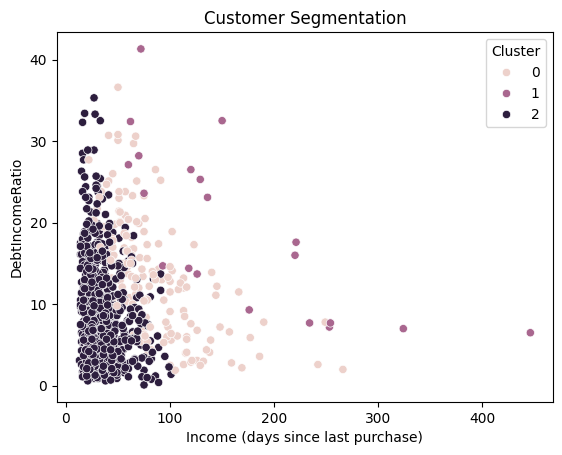

In [34]:
# Visualization of customer segments
sns.scatterplot(x='Income', y='DebtIncomeRatio', hue='Cluster', data=data)
plt.xlabel('Income (days since last purchase)')
plt.ylabel('DebtIncomeRatio')
plt.title('Customer Segmentation')
plt.show()